## Sales Prediction with Machine Learning
Forecasting sales is a difficult problem for every type of business, but it helps determine where a business should spend more on advertising and where it should cut spending. In this article, I will walk through the task of sales prediction.

#### Sales Prediction undergoes certain factors:
- Amount spent to advertise the product,
- Segment of people,
- Platform you are advertising on about your product.
- etc

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [53]:
# Load the data
df = pd.read_csv("advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# Perform simple statistics
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


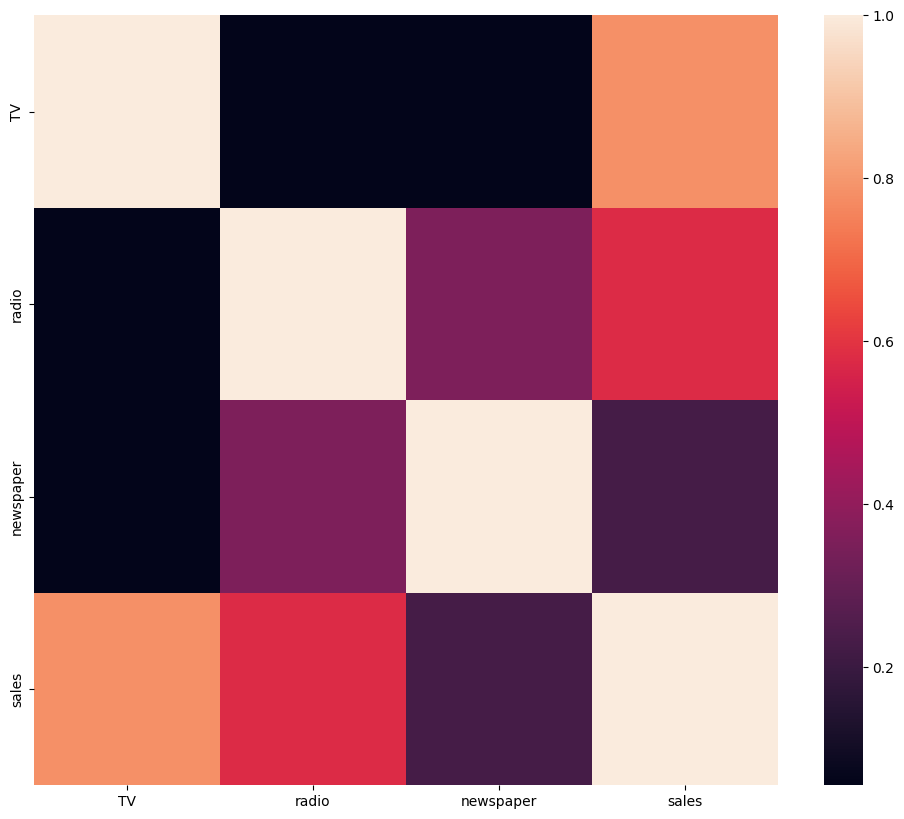

In [17]:
# Extract the correlations between features before training the model
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())
plt.show()

In [91]:
# Split the dataset into training and testing set
y = df['sales']
X = df.drop(columns='sales')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

data = pd.DataFrame(data={"Predicted Sales": y_pred.flatten()})

In [59]:
data.head()

,Predicted Sales
0,16.408024
1,20.889882
2,21.553843
3,10.608503
4,22.112373


In [93]:
new_data = X_test
new_data['sales'] = y_test
new_data['Predicted Sales'] = y_pred

In [95]:
new_data

,TV,radio,newspaper,sales,Predicted Sales
95,163.3,31.6,52.9,16.9,16.408024
15,195.4,47.7,52.9,22.4,20.889882
30,292.9,28.3,43.2,21.4,21.553843
158,11.7,36.9,45.2,7.3,10.608503
128,220.3,49.0,3.2,24.7,22.112373
115,75.1,35.0,52.7,12.6,13.105592
69,216.8,43.9,27.2,22.3,21.057192
170,50.0,11.6,18.4,8.4,7.461010
174,222.4,3.4,13.1,11.5,13.606346
45,175.1,22.5,31.5,14.9,15.155070


In [85]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 95 to 76
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TV               40 non-null     float64
 1   radio            40 non-null     float64
 2   newspaper        40 non-null     float64
 3   Predicted Sales  40 non-null     float64
dtypes: float64(4)
memory usage: 2.6 KB


In [97]:
# Save the model for later usage
import pickle

with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print('Model saved successfully')

Model saved successfully
